# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [3]:
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=8)
clusters = kmeans.fit(X)
 
score = silhouette_score(X, clusters.labels_, metric='euclidean')
print(score)

0.5369913269089153


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [5]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit(X)
 
score = silhouette_score(X, clusters.labels_, metric='euclidean')
print(score)

0.5489993239795691


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [6]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit(X)
 
score = silhouette_score(X, clusters.labels_, metric='euclidean')
print(score)

0.5711381937868844


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


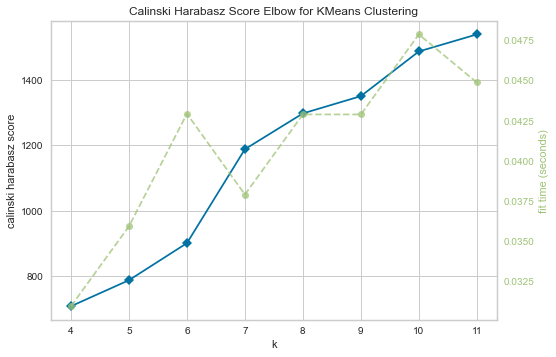

In [7]:
from yellowbrick.cluster import KElbowVisualizer
 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12),metric='calinski_harabasz')
visualizer.fit(X)
visualizer.poof()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

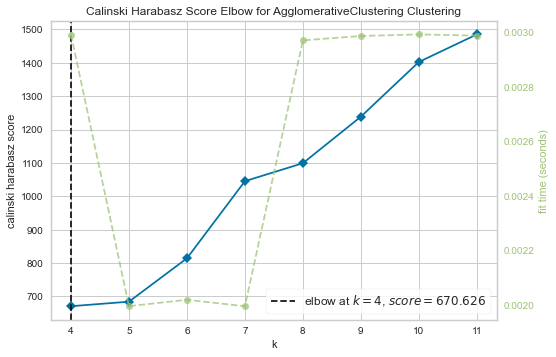

In [8]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering()
cluster.fit_predict(X)
visualizer = KElbowVisualizer(cluster, k=(4,12),metric='calinski_harabasz')
visualizer.fit(X)
visualizer.poof()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [9]:
df=pd.DataFrame(X)
df['Cluster']=y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
import seaborn as sns

models = KMeans(n_clusters = 6)
models.fit(X)
X2=X.copy()
X['clusters_kmean'] = models.labels_

sns.pairplot(data = X, hue = 'clusters_kmean')

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

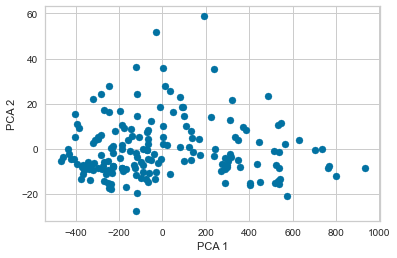

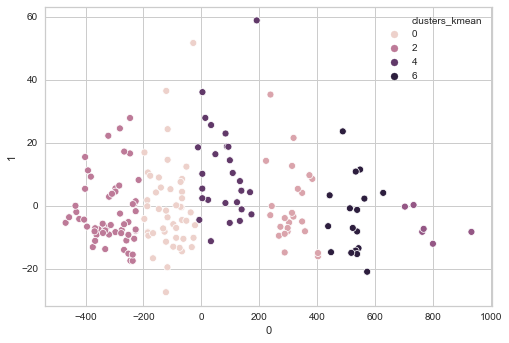

In [11]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=2)
pca.fit(X2)
pca_X = pca.transform(X2)
PCA_df=pd.DataFrame(data = pca_X)
 
fig = plt.figure(figsize=(6, 6))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4)]
 
ax[0].scatter(pca_X[:, 0], pca_X[:, 1])
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")
y = np.ones(X.shape[0])
 
plt.show()

sns.scatterplot(x = PCA_df.loc[:,0], y = PCA_df.loc[:,1], hue = X['clusters_kmean'])

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

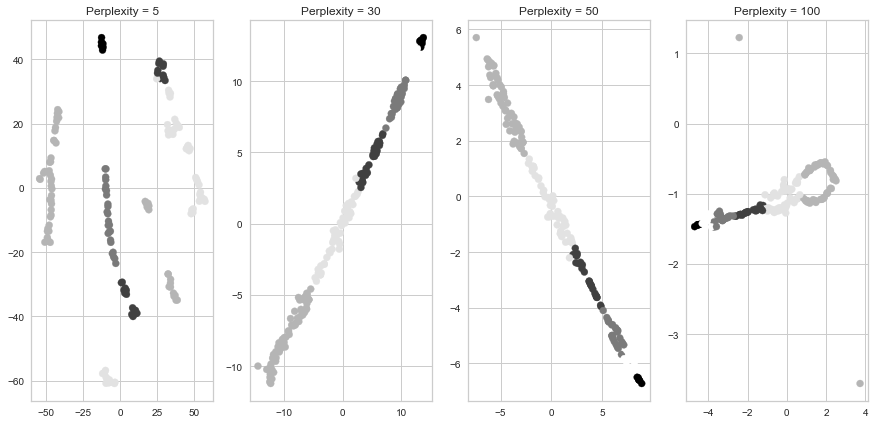

In [30]:
from sklearn.manifold import TSNE
 
#X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

fig, ax = plt.subplots(1, 4, figsize=(15, 7))

for i, perp in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(pca_X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1],c=X['clusters_kmean'].values)
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show()